<a href="https://colab.research.google.com/github/Jhonkr/SEATEL2019/blob/master/Simple_MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libs

In [1]:
import keras
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import load_model

import numpy as np
import pandas

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

import time

Using TensorFlow backend.


In [0]:
#Seed for reproducibility
seed = 1
np.random.seed(seed)

## MLP

In [3]:
#Import Dataset
dataset = keras.datasets.mnist
((x_train, y_train),(x_test, y_test)) = dataset.load_data()

11493376/11490434 [==============================] - 1s 0us/step


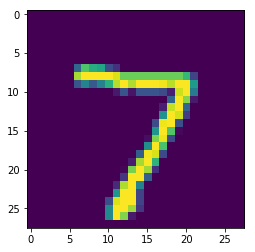

In [4]:
plt.imshow(x_test[0])

In [5]:
x_train = x_train/float(255)                                              # Images Normalization

model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),    # Building Sequential model, Layers and input_shape of 28/28
                          keras.layers.Dense(512, activation= 'relu'),    # Note that the Weights of Convulutional layer need to be flattened.
                                                                          # (made 1-dimensional) before passing them to the fully connected Dense layer.
                          keras.layers.Dropout(0.05),                     # Dropout function to prevent over-fitting 
                          keras.layers.Dense(10, activation= 'softmax')]) # Number of neuron in out layer is 10

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer = 'adam',                            #For 2> categories is common use Adam optimizer
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) 

In [7]:
history = model.fit(x_train,       # Test images
          y_train,                 # Test labels
          epochs = 5,              # Epochs is number of times that the NN is trained
          validation_split = 0.2,   # Validation split of 20%
          batch_size = 100)   

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 150us/step - loss: 0.2883 - acc: 0.9165 - val_loss: 0.1474 - val_acc: 0.9584
Epoch 2/5
48000/48000 [==============================] - 6s 135us/step - loss: 0.1188 - acc: 0.9650 - val_loss: 0.0984 - val_acc: 0.9689
Epoch 3/5
48000/48000 [==============================] - 6s 135us/step - loss: 0.0768 - acc: 0.9775 - val_loss: 0.0909 - val_acc: 0.9721
Epoch 4/5
48000/48000 [==============================] - 6s 131us/step - loss: 0.0558 - acc: 0.9830 - val_loss: 0.0798 - val_acc: 0.9751
Epoch 5/5
48000/48000 [==============================] - 6s 132us/step - loss: 0.0408 - acc: 0.9881 - val_loss: 0.0753 - val_acc: 0.9768


In [9]:
test = model.predict(x_test)
print("Test result: ",np.argmax(test[2]))
print("Number of equivalent image:", y_test[2])


Test result:  1
Number of equivalent image: 1


In [10]:
loss_test, acc_test = model.evaluate(x_test, y_test)
print('My test loss:', loss_test)
print('My test acc:', acc_test*100)

10000/10000 [==============================] - 1s 54us/step
My test loss: 0.35327318998706103
My test acc: 97.77


In [11]:
history.history

{'acc': [0.9165000014007092,
  0.9650208380073309,
  0.977520843843619,
  0.9829791775594156,
  0.9881458431482315],
 'loss': [0.2883205562752361,
  0.11877012837988635,
  0.0767862135428004,
  0.055848735260466735,
  0.040764375240541995],
 'val_acc': [0.9584166705608368,
  0.9689166729648908,
  0.9720833420753479,
  0.975083340704441,
  0.9767500082651774],
 'val_loss': [0.1473632623751958,
  0.09838173707248643,
  0.09094139266914378,
  0.07982869879536642,
  0.07527026496536564]}

In [0]:
model.save('model.h5')
model_saved = load_model('model.h5')

In [13]:
test_model_saved = model_saved.predict(x_test)
print('Result saved model:', np.argmax(test_model_saved[1]))
print('Number equivalent of the image:', y_test[1])

Result saved model: 2
Number equivalent of the image: 2
